# The price of a car depends on a lot of factors like the goodwill of the brand of the car,features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.





<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>Exploratory Data Analysis</b></font>


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
from xgboost import XGBRegressor
from xgboost import plot_importance
import optuna
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

In [19]:

df = pd.read_csv(R'carpredict.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [21]:
df.duplicated().sum()

0

In [22]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


In [23]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [24]:
df1= df.copy()

In [25]:
df1['CarName'].sample(5)

44                 isuzu D-Max 
91                 nissan rogue
98               nissan clipper
2      alfa-romero Quadrifoglio
169              toyota starlet
Name: CarName, dtype: object

In [26]:
df1['model'] = [x.split()[0] for x in df1['CarName']]
df1['model'] = df1['model'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})


In [27]:
df1= df1.drop(['car_ID','CarName'], axis=1)

In [28]:
numerical= df1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns


<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>


In [29]:
df1['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [30]:
print( f"Skewness: {df1['price'].skew()}")

Skewness: 1.7776781560914454


<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Numerical Features</b></font>


In [32]:
df1[numerical].iplot(kind='hist');

In [33]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

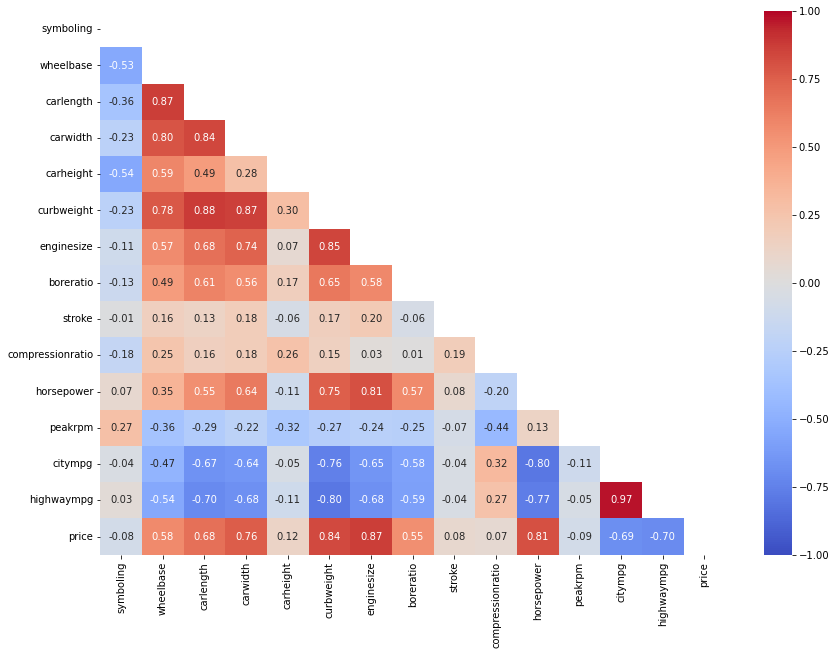

In [34]:
numerical1= df1.select_dtypes('number').columns


matrix = np.triu(df1[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df1[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [35]:
df1 = df1.drop('citympg',axis=1)

In [36]:
df1[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


### Model & Price

In [37]:
print(df1.groupby('model')['price'].mean().sort_values())
print()
df1.groupby('model')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
Volkswagen     10077.500000
Nissan         10415.666667
Mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64



### Get the Dummies

In [38]:
df2 = pd.get_dummies(df1, columns=categorical, drop_first=True)
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


<a id="7"></a>
<font color="lightseagreen" size=+1.5><b>Baseline Model</b></font>


In [39]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')




model : LinearRegression() and  rmse score is : 2650.560337022274, r2 score is 0.8985995076954894


# Ridge &  Lasso  &  Elasticnet  &  KNN with Scaler and Transformer & Random Forest& Gradient Boosting & Extra Trees & XGBoost


In [47]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rr,las,el,knn,rf,gb,et,xgb]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors','RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2423.29, r2 score is 0.92
model : Lasso() and  rmse score is : 2329.06, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3350.1, r2 score is 0.84
model : KNeighborsRegressor() and  rmse score is : 4048.13, r2 score is 0.76
model : RandomForestRegressor(random_state=42) and  rmse score is : 1964.13, r2 score is 0.94
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2385.13, r2 score is 0.92
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2425.18, r2 score is 0.92
model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_t

,RMSE,R2_Test
Ridge,2423.29,0.92
Lasso,2329.06,0.92
ElasticNet,3350.10,0.84
KNeighbors,4048.13,0.76
RandomForest,1964.13,0.94
GradientBoost,2385.13,0.92
ExtraTree,2425.18,0.92
XGB,2416.08,0.92


<a id="10"></a>
<font color="lightseagreen" size=+1.5><b>Best Model with the Hyperparameter Tuning</b></font>


In [42]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')




 rmse score is : 1975.8483, r2 score is 0.9437


<a id="11"></a>
<font color="lightseagreen" size=+1.5><b>Feature Importance</b></font>


symboling : 0.001
wheelbase : 0.008
carlength : 0.013
carwidth : 0.024
carheight : 0.004
curbweight : 0.167
enginesize : 0.6
boreratio : 0.005
stroke : 0.003
compressionratio : 0.005
horsepower : 0.028
peakrpm : 0.005
highwaympg : 0.118
enginetype_ohc : 0.001
model_bmw : 0.006



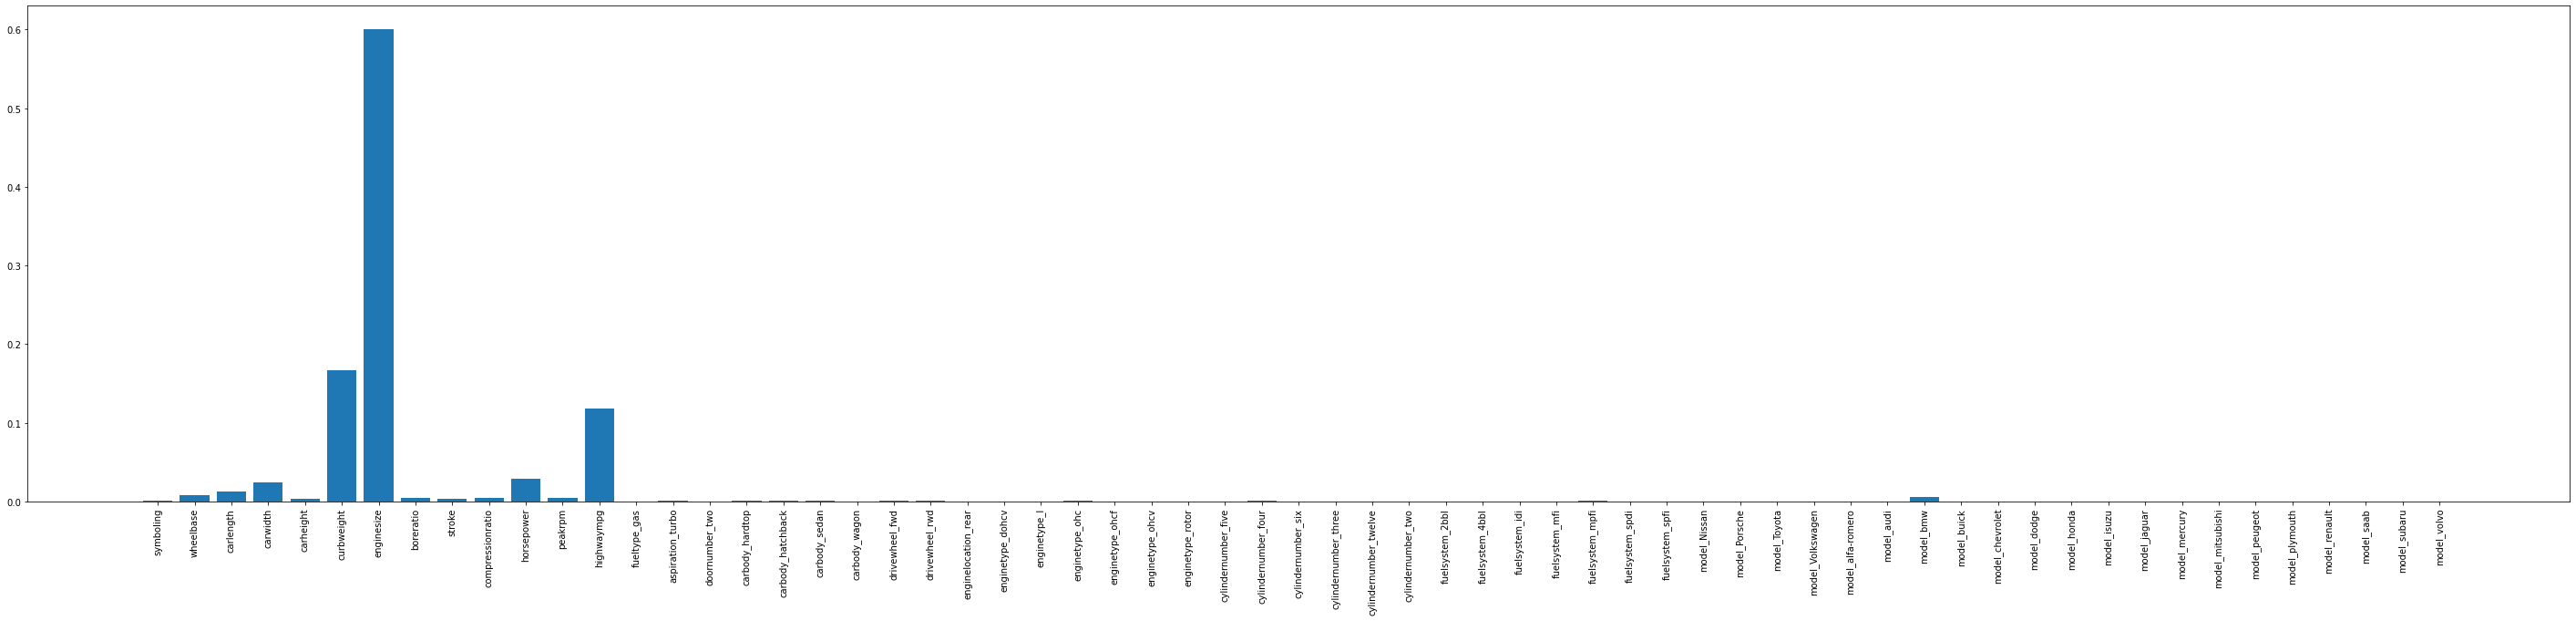

In [46]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (50,16)
plt.show()
#Based on the Random Forest Regressor:
#enginesize
#curbweight
#highway mpg
#horse power....have biggest importance scores.

# predict with new data


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the car data into a Pandas DataFrame
car_data = pd.read_csv('carpredict.csv')  # Replace 'car_data.csv' with your own dataset

# Select the relevant features for prediction
selected_features = ['symboling', 'wheelbase', 'enginesize', 'horsepower', 'citympg', 'highwaympg']

# Split the data into training and testing sets
X = car_data[selected_features]
y = car_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Predict the price with new data
new_data = pd.DataFrame({
    'symboling': [0],
    'wheelbase': [100],
    'enginesize': [200],
    'horsepower': [150],
    'citympg': [25],
    'highwaympg': [32]
})
new_price = model.predict(new_data)
print(f"Predicted Price: {new_price[0]}")


Root Mean Squared Error: 3866.2118078068656
Predicted Price: 22761.01737627401
